In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
val = np.seterr(all='ignore')

1)	Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), 

In [2]:
df = pd.read_csv('data2.txt', sep=",", header=None)
df.columns = ["x", "y"]

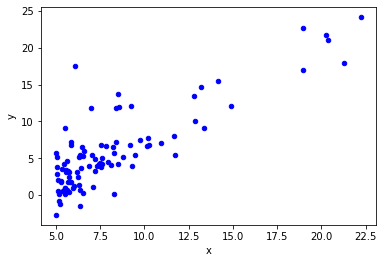

In [3]:
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.show()

Normal equation to find the coefficient

In [4]:
x = df['x'].values
y = df['y'].values
m = len(x)
x_bias = np.ones((m,1))
x = np.reshape(x,(m,1))
x = np.append(x_bias,x,axis=1)
x_transpose = np.transpose(x)
x_transpose_dot_x = x_transpose.dot(x)
temp_1 = np.linalg.inv(x_transpose_dot_x)
temp_2=x_transpose.dot(y)
theta =temp_1.dot(temp_2)
print("Coefficients: ",theta)

Coefficients:  [-3.89578088  1.19303364]


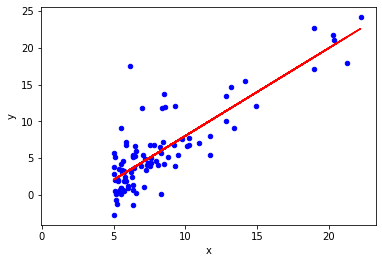

In [5]:
y = theta[0] + theta[1]*x
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.plot(x,y,'-',color='red')
plt.show()

# a)	Split dataset into 80% for training and 20% for testing. 

In [6]:
m = len(x)
x = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(77, 1)

# Gradient Descent using (Batch mode) to find Co-efficients

In [8]:
def cal_cost(theta,X,y):
    cost= np.sum(np.square(((np.dot(X, theta)) - y))) / (2 * (len(X)))  # cost
    return cost

In [9]:
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(x,theta)
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta,x,y)
    return theta, cost_history, theta_history

In [10]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x_train),1)),x_train]
theta,cost_history,theta_history = gradient_descent(X_b,y_train,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

Theta0:          -3.277,
Theta1:          1.141
Final cost/MSE:  4.926
-------------------------
Iterations:  0  Cost Function Value:  8.787
Iterations:  1  Cost Function Value:  6.94
Iterations:  2  Cost Function Value:  6.875
Iterations:  3  Cost Function Value:  6.866
Iterations:  4  Cost Function Value:  6.858
Iterations:  5  Cost Function Value:  6.851
Iterations:  6  Cost Function Value:  6.844
Iterations:  7  Cost Function Value:  6.837
Iterations:  8  Cost Function Value:  6.83
Iterations:  9  Cost Function Value:  6.823
Iterations:  10  Cost Function Value:  6.816
Iterations:  11  Cost Function Value:  6.809
Iterations:  12  Cost Function Value:  6.802
Iterations:  13  Cost Function Value:  6.795
Iterations:  14  Cost Function Value:  6.788
Iterations:  15  Cost Function Value:  6.781
Iterations:  16  Cost Function Value:  6.774
Iterations:  17  Cost Function Value:  6.767
Iterations:  18  Cost Function Value:  6.761
Iterations:  19  Cost Function Value:  6.754
Iterations:  20

Iterations:  459  Cost Function Value:  5.257
Iterations:  460  Cost Function Value:  5.255
Iterations:  461  Cost Function Value:  5.254
Iterations:  462  Cost Function Value:  5.252
Iterations:  463  Cost Function Value:  5.251
Iterations:  464  Cost Function Value:  5.25
Iterations:  465  Cost Function Value:  5.248
Iterations:  466  Cost Function Value:  5.247
Iterations:  467  Cost Function Value:  5.246
Iterations:  468  Cost Function Value:  5.244
Iterations:  469  Cost Function Value:  5.243
Iterations:  470  Cost Function Value:  5.242
Iterations:  471  Cost Function Value:  5.24
Iterations:  472  Cost Function Value:  5.239
Iterations:  473  Cost Function Value:  5.238
Iterations:  474  Cost Function Value:  5.236
Iterations:  475  Cost Function Value:  5.235
Iterations:  476  Cost Function Value:  5.234
Iterations:  477  Cost Function Value:  5.232
Iterations:  478  Cost Function Value:  5.231
Iterations:  479  Cost Function Value:  5.23
Iterations:  480  Cost Function Value

Iterations:  729  Cost Function Value:  5.017
Iterations:  730  Cost Function Value:  5.016
Iterations:  731  Cost Function Value:  5.016
Iterations:  732  Cost Function Value:  5.015
Iterations:  733  Cost Function Value:  5.015
Iterations:  734  Cost Function Value:  5.014
Iterations:  735  Cost Function Value:  5.014
Iterations:  736  Cost Function Value:  5.013
Iterations:  737  Cost Function Value:  5.012
Iterations:  738  Cost Function Value:  5.012
Iterations:  739  Cost Function Value:  5.011
Iterations:  740  Cost Function Value:  5.011
Iterations:  741  Cost Function Value:  5.01
Iterations:  742  Cost Function Value:  5.01
Iterations:  743  Cost Function Value:  5.009
Iterations:  744  Cost Function Value:  5.009
Iterations:  745  Cost Function Value:  5.008
Iterations:  746  Cost Function Value:  5.008
Iterations:  747  Cost Function Value:  5.007
Iterations:  748  Cost Function Value:  5.007
Iterations:  749  Cost Function Value:  5.006
Iterations:  750  Cost Function Valu

Iterations:  979  Cost Function Value:  4.93
Iterations:  980  Cost Function Value:  4.93
Iterations:  981  Cost Function Value:  4.93
Iterations:  982  Cost Function Value:  4.929
Iterations:  983  Cost Function Value:  4.929
Iterations:  984  Cost Function Value:  4.929
Iterations:  985  Cost Function Value:  4.929
Iterations:  986  Cost Function Value:  4.929
Iterations:  987  Cost Function Value:  4.928
Iterations:  988  Cost Function Value:  4.928
Iterations:  989  Cost Function Value:  4.928
Iterations:  990  Cost Function Value:  4.928
Iterations:  991  Cost Function Value:  4.928
Iterations:  992  Cost Function Value:  4.927
Iterations:  993  Cost Function Value:  4.927
Iterations:  994  Cost Function Value:  4.927
Iterations:  995  Cost Function Value:  4.927
Iterations:  996  Cost Function Value:  4.927
Iterations:  997  Cost Function Value:  4.926
Iterations:  998  Cost Function Value:  4.926
Iterations:  999  Cost Function Value:  4.926


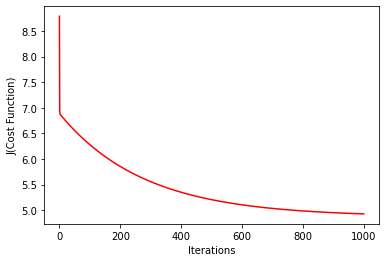

In [11]:
fig,ax = plt.subplots(figsize=(6,4))

ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')


In [12]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x_test),1)),x_test]
theta,cost_history,theta_history = gradient_descent(X_b,y_test,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

Theta0:          -2.742,
Theta1:          1.038
Final cost/MSE:  2.867
-------------------------
Iterations:  0  Cost Function Value:  4.941
Iterations:  1  Cost Function Value:  3.899
Iterations:  2  Cost Function Value:  3.863
Iterations:  3  Cost Function Value:  3.858
Iterations:  4  Cost Function Value:  3.855
Iterations:  5  Cost Function Value:  3.851
Iterations:  6  Cost Function Value:  3.847
Iterations:  7  Cost Function Value:  3.844
Iterations:  8  Cost Function Value:  3.84
Iterations:  9  Cost Function Value:  3.836
Iterations:  10  Cost Function Value:  3.833
Iterations:  11  Cost Function Value:  3.829
Iterations:  12  Cost Function Value:  3.826
Iterations:  13  Cost Function Value:  3.822
Iterations:  14  Cost Function Value:  3.818
Iterations:  15  Cost Function Value:  3.815
Iterations:  16  Cost Function Value:  3.811
Iterations:  17  Cost Function Value:  3.808
Iterations:  18  Cost Function Value:  3.804
Iterations:  19  Cost Function Value:  3.801
Iterations:  2

Iterations:  350  Cost Function Value:  3.129
Iterations:  351  Cost Function Value:  3.128
Iterations:  352  Cost Function Value:  3.127
Iterations:  353  Cost Function Value:  3.126
Iterations:  354  Cost Function Value:  3.125
Iterations:  355  Cost Function Value:  3.124
Iterations:  356  Cost Function Value:  3.123
Iterations:  357  Cost Function Value:  3.122
Iterations:  358  Cost Function Value:  3.121
Iterations:  359  Cost Function Value:  3.12
Iterations:  360  Cost Function Value:  3.119
Iterations:  361  Cost Function Value:  3.118
Iterations:  362  Cost Function Value:  3.117
Iterations:  363  Cost Function Value:  3.116
Iterations:  364  Cost Function Value:  3.115
Iterations:  365  Cost Function Value:  3.114
Iterations:  366  Cost Function Value:  3.113
Iterations:  367  Cost Function Value:  3.112
Iterations:  368  Cost Function Value:  3.111
Iterations:  369  Cost Function Value:  3.11
Iterations:  370  Cost Function Value:  3.109
Iterations:  371  Cost Function Valu

Iterations:  725  Cost Function Value:  2.914
Iterations:  726  Cost Function Value:  2.914
Iterations:  727  Cost Function Value:  2.913
Iterations:  728  Cost Function Value:  2.913
Iterations:  729  Cost Function Value:  2.913
Iterations:  730  Cost Function Value:  2.913
Iterations:  731  Cost Function Value:  2.912
Iterations:  732  Cost Function Value:  2.912
Iterations:  733  Cost Function Value:  2.912
Iterations:  734  Cost Function Value:  2.912
Iterations:  735  Cost Function Value:  2.911
Iterations:  736  Cost Function Value:  2.911
Iterations:  737  Cost Function Value:  2.911
Iterations:  738  Cost Function Value:  2.911
Iterations:  739  Cost Function Value:  2.91
Iterations:  740  Cost Function Value:  2.91
Iterations:  741  Cost Function Value:  2.91
Iterations:  742  Cost Function Value:  2.91
Iterations:  743  Cost Function Value:  2.909
Iterations:  744  Cost Function Value:  2.909
Iterations:  745  Cost Function Value:  2.909
Iterations:  746  Cost Function Value:

Iterations:  975  Cost Function Value:  2.87
Iterations:  976  Cost Function Value:  2.87
Iterations:  977  Cost Function Value:  2.87
Iterations:  978  Cost Function Value:  2.869
Iterations:  979  Cost Function Value:  2.869
Iterations:  980  Cost Function Value:  2.869
Iterations:  981  Cost Function Value:  2.869
Iterations:  982  Cost Function Value:  2.869
Iterations:  983  Cost Function Value:  2.869
Iterations:  984  Cost Function Value:  2.869
Iterations:  985  Cost Function Value:  2.869
Iterations:  986  Cost Function Value:  2.869
Iterations:  987  Cost Function Value:  2.868
Iterations:  988  Cost Function Value:  2.868
Iterations:  989  Cost Function Value:  2.868
Iterations:  990  Cost Function Value:  2.868
Iterations:  991  Cost Function Value:  2.868
Iterations:  992  Cost Function Value:  2.868
Iterations:  993  Cost Function Value:  2.868
Iterations:  994  Cost Function Value:  2.868
Iterations:  995  Cost Function Value:  2.868
Iterations:  996  Cost Function Value

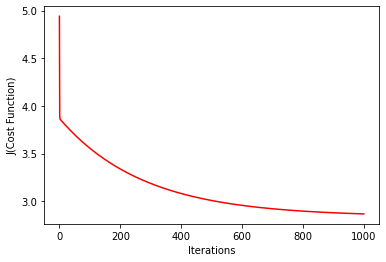

In [13]:
fig,ax = plt.subplots(figsize=(6,4))

ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

# Gradient Descent using (Stochastic mode) to find Co-efficients

In [14]:
m = len(x)
X = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(77, 1)

In [16]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations) 
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [17]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x_train),1)),x_train]
theta,cost_history = stocashtic_gradient_descent(X_b,y_train,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

Theta0:          -3.335,
Theta1:          1.156
Final cost/MSE:  305.413
-------------------------
Iterations:  0  Cost Function Value:  723.913
Iterations:  1  Cost Function Value:  433.7
Iterations:  2  Cost Function Value:  489.08
Iterations:  3  Cost Function Value:  339.46
Iterations:  4  Cost Function Value:  443.159
Iterations:  5  Cost Function Value:  673.532
Iterations:  6  Cost Function Value:  431.866
Iterations:  7  Cost Function Value:  504.984
Iterations:  8  Cost Function Value:  593.353
Iterations:  9  Cost Function Value:  469.08
Iterations:  10  Cost Function Value:  524.185
Iterations:  11  Cost Function Value:  619.679
Iterations:  12  Cost Function Value:  474.275
Iterations:  13  Cost Function Value:  594.728
Iterations:  14  Cost Function Value:  383.288
Iterations:  15  Cost Function Value:  530.097
Iterations:  16  Cost Function Value:  398.241
Iterations:  17  Cost Function Value:  460.0
Iterations:  18  Cost Function Value:  620.51
Iterations:  19  Cost Func

Iterations:  715  Cost Function Value:  314.945
Iterations:  716  Cost Function Value:  326.885
Iterations:  717  Cost Function Value:  232.988
Iterations:  718  Cost Function Value:  437.375
Iterations:  719  Cost Function Value:  347.089
Iterations:  720  Cost Function Value:  437.122
Iterations:  721  Cost Function Value:  692.174
Iterations:  722  Cost Function Value:  369.026
Iterations:  723  Cost Function Value:  512.959
Iterations:  724  Cost Function Value:  250.933
Iterations:  725  Cost Function Value:  401.639
Iterations:  726  Cost Function Value:  402.543
Iterations:  727  Cost Function Value:  426.763
Iterations:  728  Cost Function Value:  427.004
Iterations:  729  Cost Function Value:  446.016
Iterations:  730  Cost Function Value:  505.986
Iterations:  731  Cost Function Value:  389.18
Iterations:  732  Cost Function Value:  454.135
Iterations:  733  Cost Function Value:  371.04
Iterations:  734  Cost Function Value:  162.038
Iterations:  735  Cost Function Value:  27

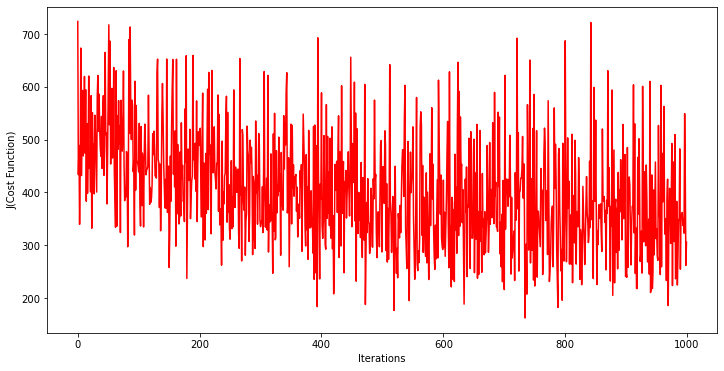

In [18]:
fig,ax = plt.subplots(figsize=(12,6))
ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

In [19]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x_test),1)),x_test]
theta,cost_history = stocashtic_gradient_descent(X_b,y_test,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

Theta0:          -2.437,
Theta1:          1.046
Final cost/MSE:  48.628
-------------------------
Iterations:  0  Cost Function Value:  123.219
Iterations:  1  Cost Function Value:  63.235
Iterations:  2  Cost Function Value:  80.627
Iterations:  3  Cost Function Value:  71.04
Iterations:  4  Cost Function Value:  41.959
Iterations:  5  Cost Function Value:  51.929
Iterations:  6  Cost Function Value:  96.502
Iterations:  7  Cost Function Value:  90.659
Iterations:  8  Cost Function Value:  61.362
Iterations:  9  Cost Function Value:  79.269
Iterations:  10  Cost Function Value:  66.649
Iterations:  11  Cost Function Value:  106.294
Iterations:  12  Cost Function Value:  56.562
Iterations:  13  Cost Function Value:  69.574
Iterations:  14  Cost Function Value:  113.376
Iterations:  15  Cost Function Value:  83.87
Iterations:  16  Cost Function Value:  106.59
Iterations:  17  Cost Function Value:  101.048
Iterations:  18  Cost Function Value:  81.079
Iterations:  19  Cost Function Value

Iterations:  711  Cost Function Value:  98.631
Iterations:  712  Cost Function Value:  117.842
Iterations:  713  Cost Function Value:  51.58
Iterations:  714  Cost Function Value:  34.694
Iterations:  715  Cost Function Value:  100.132
Iterations:  716  Cost Function Value:  33.785
Iterations:  717  Cost Function Value:  47.223
Iterations:  718  Cost Function Value:  72.638
Iterations:  719  Cost Function Value:  34.317
Iterations:  720  Cost Function Value:  65.017
Iterations:  721  Cost Function Value:  48.606
Iterations:  722  Cost Function Value:  76.762
Iterations:  723  Cost Function Value:  68.34
Iterations:  724  Cost Function Value:  59.462
Iterations:  725  Cost Function Value:  117.613
Iterations:  726  Cost Function Value:  28.93
Iterations:  727  Cost Function Value:  32.757
Iterations:  728  Cost Function Value:  46.266
Iterations:  729  Cost Function Value:  76.366
Iterations:  730  Cost Function Value:  60.815
Iterations:  731  Cost Function Value:  80.623
Iterations:  

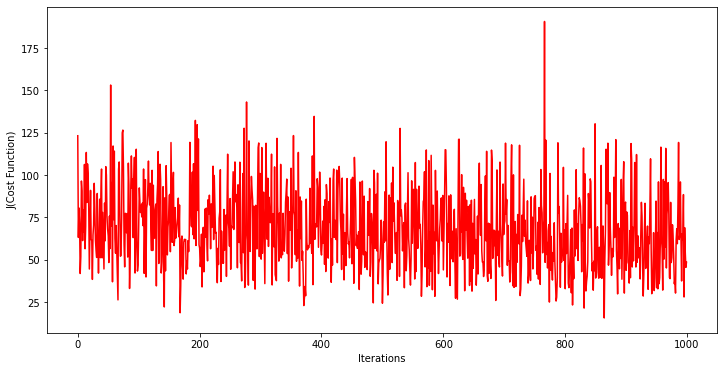

In [20]:
fig,ax = plt.subplots(figsize=(12,6))
ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

# c)	Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate. 
First we are training the data with learning rate. Then test the data for finding best learning rate.


Cost Function for LR  0.001 :  8.081
Cost Function for LR  0.002 :  5.779
Cost Function for LR  0.003 :  4.972
Cost Function for LR  0.004 :  5.145
Cost Function for LR  0.005 :  5.002
Cost Function for LR  0.006 :  4.948
Cost Function for LR  0.007 :  4.818
Cost Function for LR  0.008 :  4.753
Cost Function for LR  0.009 :  4.749
Cost Function for LR  0.01 :  4.748


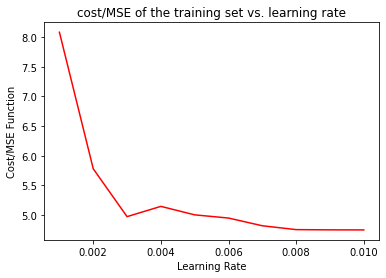

In [21]:
#For Batch
lr_list = [0.001,0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listB = []
for i in lr_list:
    lr =i
    n_iter = 1000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x_train),1)),x_train]
    theta,cost_history,theta_history = gradient_descent(X_b,y_train,theta,lr,n_iter)
    cost_function_listB.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listB,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost/MSE Function')
plt.title('cost/MSE of the training set vs. learning rate')
plt.show()

Cost Function for LR  0.001 :  392.074
Cost Function for LR  0.002 :  339.615
Cost Function for LR  0.003 :  382.904
Cost Function for LR  0.004 :  480.475
Cost Function for LR  0.005 :  322.271
Cost Function for LR  0.006 :  315.051
Cost Function for LR  0.007 :  300.129
Cost Function for LR  0.008 :  327.824
Cost Function for LR  0.009 :  374.773
Cost Function for LR  0.01 :  374.258


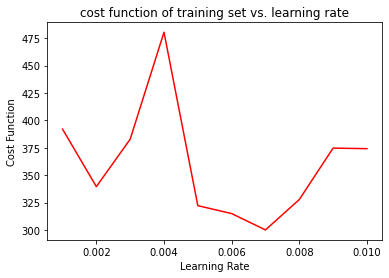

In [22]:
#For Stocastic
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listS = []
for i in lr_list:
    lr =i
    n_iter = 1000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x_train),1)),x_train]
    theta,cost_history = stocashtic_gradient_descent(X_b,y_train,theta,lr,n_iter)
    cost_function_listS.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listS,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function of training set vs. learning rate')
plt.show()

# MSE/cost function of testing set vs. learning rate (Batch mode)

Cost Function for LR  0.001 :  3.82
Cost Function for LR  0.002 :  4.516
Cost Function for LR  0.003 :  3.824
Cost Function for LR  0.004 :  3.651
Cost Function for LR  0.005 :  3.517
Cost Function for LR  0.006 :  3.613
Cost Function for LR  0.007 :  3.572
Cost Function for LR  0.008 :  3.579
Cost Function for LR  0.009 :  3.544
Cost Function for LR  0.01 :  3.526


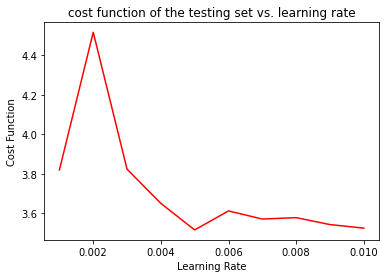

In [23]:
#For Batch
lr_list = [0.001,0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listB = []
for i in lr_list:
    lr =i
    n_iter = 1000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x_test),1)),x_test]
    theta,cost_history,theta_history = gradient_descent(X_b,y_test,theta,lr,n_iter)
    cost_function_listB.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listB,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function of the testing set vs. learning rate')
plt.show()

Cost Function for LR  0.001 :  59.829
Cost Function for LR  0.002 :  49.205
Cost Function for LR  0.003 :  134.591
Cost Function for LR  0.004 :  64.763
Cost Function for LR  0.005 :  60.255
Cost Function for LR  0.006 :  46.122
Cost Function for LR  0.007 :  106.438
Cost Function for LR  0.008 :  104.18
Cost Function for LR  0.009 :  39.021
Cost Function for LR  0.01 :  90.155


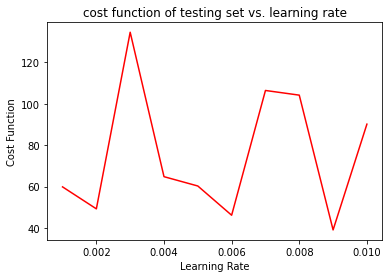

In [24]:
#For Stocastic
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listS = []
for i in lr_list:
    lr =i
    n_iter = 1000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x_test),1)),x_test]
    theta,cost_history = stocashtic_gradient_descent(X_b,y_test,theta,lr,n_iter)
    cost_function_listS.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listS,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function of testing set vs. learning rate')
plt.show()